## basics

- 应用场景：pair distributions
    - 知识蒸馏，student distribution & teacher distribution
    - VaE
    - RLHF & PPO
    - ...
    
- 真实分布 $p$，拟合分布 $q$
    - 真实分布 $p$ 往往是多峰的，

    $$
    D_{KL}(p\|q)=E_p\left[\log\frac{p}{q}\right]=\sum p\log\frac{p}{q}
    $$

    - 刻画（计算）的是 information lost，用分布 $q$ 去近似分布 $p$ 时的信息损失，是一个loss
    - 单独作为目标函数时
    
    $$
    q^{\star}=\arg\min_qD_{KL}(p\|q)
    $$
    
- 性质
    - 非负性：$D_{KL}(p\|q)\geq 0$
        - 期望的 Jensen's inequality：$\varphi\left(\operatorname{E}[X]\right) \leq \operatorname{E} \left[ \varphi(X) \right]$ ($\varphi$ 是凸函数时，比如 $\log(x)$ 就是凸函数)
        

    $$
    \begin{split}
    -D_{kl}(p\|q)&=-\sum_X p(x)\log\frac{p(x)}{q(x)}\\
    &=\sum_Xp(x)\log\frac{q(x)}{p(x)}=E_p\left[\log\frac{q(x)}{p(x)}\right]\\
    &\leq \log E_p\left[\frac{q(x)}{p(x)}\right]\\
    &=\log \sum_Xp(x)\frac{q(x)}{p(x)}=-\log 1= 0
    \end{split}
    $$

    - 证明之二（$\ln x\leq x-1$）
        - $-D_{kl}(p\|q)=\sum p(x)\log\frac{q(x)}{p(x)}\leq \sum p(x)(\frac{q(x)}{p(x)}-1)=0$
        - 由此（$D_{kl}(p\|q)\geq 0$）也可推出 gibbs equity
     
          $$
          \begin{split}
          D_{kl}(p\|q)&=\sum p(x)\log p(x) - \sum p(x)\log q(x)\geq 0\\
          \Downarrow&\\
          \sum p(x)\log p(x)\geq &\sum p(x)\log q(x)
          \end{split}
          $$

    
- references
    - https://medium.com/syncedreview/kullback-leibler-divergence-explained-e358fbacf046
    - https://www.countbayesie.com/blog/2017/5/9/kullback-leibler-divergence-explained
    - non-negative
        - https://stats.stackexchange.com/questions/335197/why-kl-divergence-is-non-negative
        - https://myweb.uiowa.edu/pbreheny/7110/wiki/gibbs-inequality.html


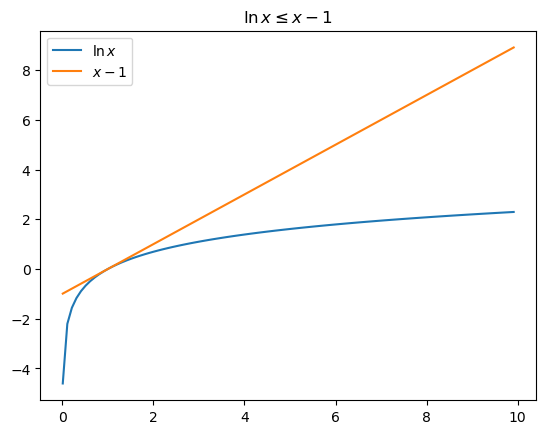

In [4]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(.01, 10, .1)
plt.plot(x, np.log(x), label=r'$\ln x$')
plt.plot(x, x-1, label=r'$x-1$')
plt.title(r'$\ln x\leq x-1$')
plt.legend()

## 离散型计算

In [1]:
import numpy as np
from scipy.special import kl_div

In [3]:
# Probability distribution P
P = np.array([0.1, 0.2, 0.7])

# Probability distribution Q
Q = np.array([0.2, 0.2, 0.6])

In [5]:
kl_div(P, Q).sum()

0.03859075782308635

In [6]:
np.sum(P * np.log(P/Q))

0.038590757823086325

## 连续型计算

$$
\begin{align}
KL(p, q) &= - \int p(x) \log q(x) dx + \int p(x) \log p(x) dx\\\\
&=\frac{1}{2} \log (2 \pi \sigma_2^2) + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2 \sigma_2^2} - \frac{1}{2} (1 + \log 2 \pi \sigma_1^2)\\\\
&= \log \frac{\sigma_2}{\sigma_1} + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2 \sigma_2^2} - \frac{1}{2}
\end{align}
$$

In [20]:
from scipy.stats import norm

# Define two Gaussian distributions
P = norm(loc=0, scale=1)
Q = norm(loc=1, scale=2)

In [21]:
# Compute a definite integral.
from scipy.integrate import quad

In [30]:
Q.pdf(-10)

5.3848800212716394e-08

In [22]:
def kl_continuous(P, Q, lower=-np.inf, upper=np.inf):
    # Define the integrand
    def integrand(x):
        return P.pdf(x) * np.log(P.pdf(x) / Q.pdf(x))

    # Calculate the integral
    return quad(integrand, lower, upper)[0]

In [31]:
kl_continuous(P, Q, lower=-10, upper=10)

0.4431471805599454

In [33]:
np.log(2/1) + (1**1+1**1)/(2*2**2) - 1/2

0.4431471805599453